In [ ]:
import pandas as pd
data = {
    'Variable Name': ['ID_LINE', 'AGE_OPERATOR', 'YEARS_EXP', 'SENIORITY', 'EMPLOYEE_CAT',
                      'HOURS_OFTRAINING_SECURITY', 'HOURS_OFTRAINING_POSITION', 'GRADE_TEOREXAM',
                      'GRADE_PRACTICALEXAM', 'NUMBER_ILLS', 'SCORE_RISKOFMACH', 'SCORE_ILLUM',
                      'NOISE_ATPLACE', 'NUMBER_EXTRAHOURS', 'NUMBER_RESTHOURS', 'SCORE_HIDRAT',
                      'USE_PPE', 'USE_ADEQTOOLS', 'SUFFER_ANXIETY', 'EXPOSED_QUIM', 'AVAILABLE_SPACE',
                      'SCORE_FATIGUE', 'EVAL_TIMEAVAIL', 'EVAL_KNOWSUFFIC', 'TEMP_PLACEOFWORK', 'ACA'],
    'Measurement Type': ['Nominal', 'Ratio', 'Ratio', 'Ratio', 'Ordinal',
                         'Ratio', 'Ratio', 'Scale', 'Scale', 'Ratio', 'Scale', 'Scale',
                         'Ratio', 'Ratio', 'Ratio', 'Scale', 'Nominal', 'Nominal', 'Nominal', 'Scale', 'Scale',
                         'Scale', 'Scale', 'Scale', 'Ratio', 'Ratio'],
    'Variable Role': ['Excluded', 'Predictor', 'Predictor', 'Predictor', 'Predictor',
                      'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Outcome', 'Predictor',
                      'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Predictor',
                      'Predictor', 'Predictor', 'Predictor', 'Predictor', 'Outcome']
}
df = pd.DataFrame(data)
from IPython.display import display
display(df)


,Variable Name,Measurement Type,Variable Role
0,ID_LINE,Nominal,Excluded
1,AGE_OPERATOR,Ratio,Predictor
2,YEARS_EXP,Ratio,Predictor
3,SENIORITY,Ratio,Predictor
4,EMPLOYEE_CAT,Ordinal,Predictor
5,HOURS_OFTRAINING_SECURITY,Ratio,Predictor
6,HOURS_OFTRAINING_POSITION,Ratio,Predictor
7,GRADE_TEOREXAM,Scale,Predictor
8,GRADE_PRACTICALEXAM,Scale,Predictor
9,NUMBER_ILLS,Ratio,Predictor


**Q1)B)** The company Elektra operates within the Manufacturing Industry, with a specialized focus on the production of electrical cables and conductors. They have a wide variety of products catering to various sectors such as automotive, energy, home appliances, and more. Additionally, they have a goal of leading the energy transmission market and plan on becoming a key player in the manufacturing sector.

**Q2)**
**Research Questions:**

1)How do factors like age, experience, and training impact the risk of accidents (as measured by **SCORE_RISKOFMACH** and **ACA**) on the production line?

2)What is the relationship between workplace conditions (such as **NOISE_ATPLACE**, **SCORE_ILLUM**, and **TEMP_PLACEOFWORK**) and employee well-being (indicated by **SUFFER_ANXIETY**, **SCORE_FATIGUE**, and **NUMBER_RESTHOURS**)?

3)Can we predict the likelihood of unsafe acts (**ACA**) based on the operator's professional profile (**AGE_OPERATOR**, **EMPLOYEE_CAT**, **YEARS_EXP**) and work environment factors (**USE_PPE**, **AVAILABLE_SPACE**)?

These questions would help us understand the biggest concern about safety that is faced by the company.

In [ ]:
#importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Loading the dataset
dp = pd.read_excel('PLANT_SECURITY_SV.xlsx')

In [ ]:
# Displaying the first few rows of the dataset
print(dp.head())

           ID_LINE  AGE_OPERATOR  YEARS_EXP  SENIORITY  EMPLOYEE_CAT  \
0       189399M851            36          6          6             6   
1      2133265M301            19          1          1             6   
2       32695VZF81            39         10         21             6   
3      4147823VZ81            22          1          1             7   
4  5106984MZV7/1 1            26          1          4             6   

   HOURS_OFTRAINING_SECURITY  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
0                       14.5                         38             100   
1                       14.5                         22              95   
2                       14.5                         38             100   
3                       14.5                         10              90   
4                       14.5                         38             100   

   GRADE_PRACTICALEXAM  NUMBER_ILLS  ...  USE_ADEQTOOLS  SUFFER?ANXIETY  \
0                  100            3  ... 

In [ ]:
# Checking for missing values
print(dp.isnull().sum())

ID_LINE                      0
AGE_OPERATOR                 0
YEARS_EXP                    0
SENIORITY                    0
EMPLOYEE_CAT                 0
HOURS_OFTRAINING_SECURITY    0
HOURS_OFTRAINING_POSITION    0
GRADE_TEOREXAM               0
GRADE_PRACTICALEXAM          0
NUMBER_ILLS                  0
SCORE_RISKOFMACH             0
SCORE_ILLUM                  0
NOISE_ATPLACE                0
NUMBER_EXTRAHOURS            0
NUMBER_RESTHOURS             0
SCORE_HIDRAT                 0
USE_PPE                      0
USE_ADEQTOOLS                0
SUFFER?ANXIETY               0
EXPOSED_QUIM                 0
SCORE_ILLUM.1                0
AVAILABLE_SPACE              0
SCORE_FATIGUE                0
EVAL_TIMEAVAIL               0
EVAL_KNOWSUFFIC              0
TEMP_PLACEOFWORK             0
ACA                          0
dtype: int64


In [ ]:
# Summary statistics for the numerical variables
print(dp.describe())

       AGE_OPERATOR   YEARS_EXP   SENIORITY  EMPLOYEE_CAT  \
count    865.000000  865.000000  865.000000    865.000000   
mean      35.958382    3.579191    7.972254      5.395376   
std        9.693241    3.100333    6.562320      1.248509   
min       19.000000    1.000000    1.000000      2.000000   
25%       28.000000    1.000000    2.000000      5.000000   
50%       34.000000    2.000000    7.000000      6.000000   
75%       44.000000    6.000000   15.000000      6.000000   
max       57.000000   10.000000   21.000000      7.000000   

       HOURS_OFTRAINING_SECURITY  HOURS_OFTRAINING_POSITION  GRADE_TEOREXAM  \
count                      865.0                 865.000000      865.000000   
mean                        14.5                  33.535260       97.115607   
std                          0.0                   7.859382        5.020610   
min                         14.5                  10.000000       80.000000   
25%                         14.5                  32.00

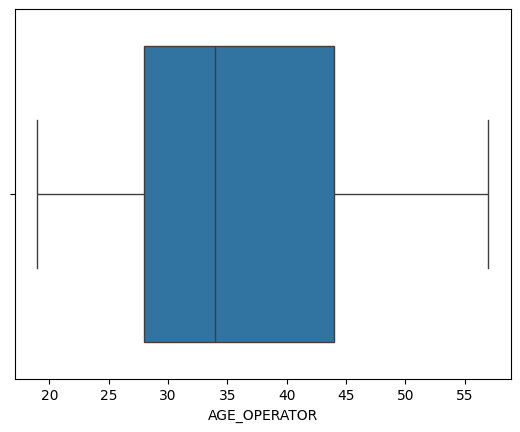

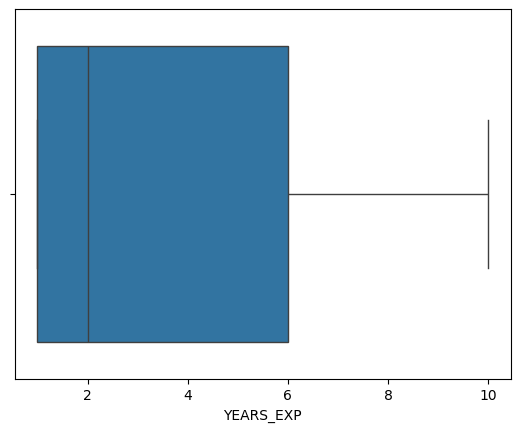

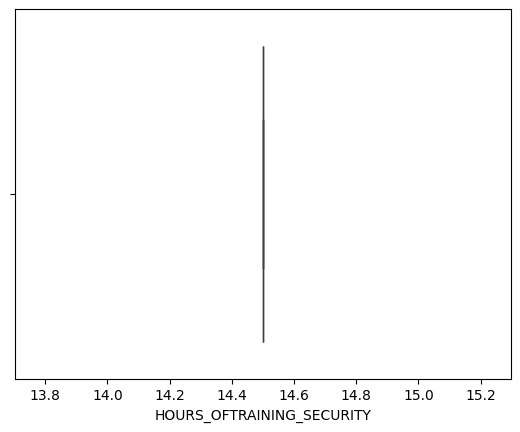

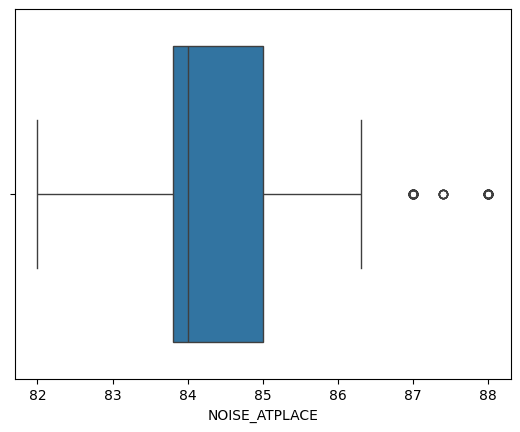

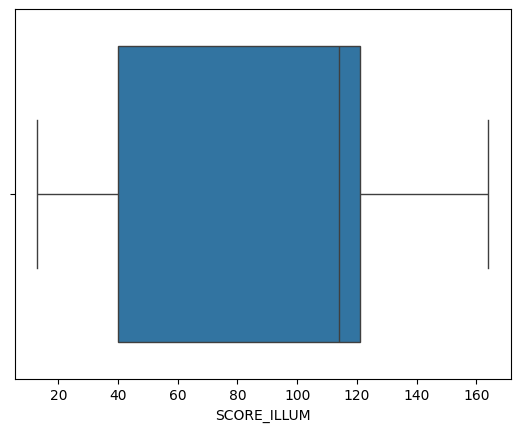

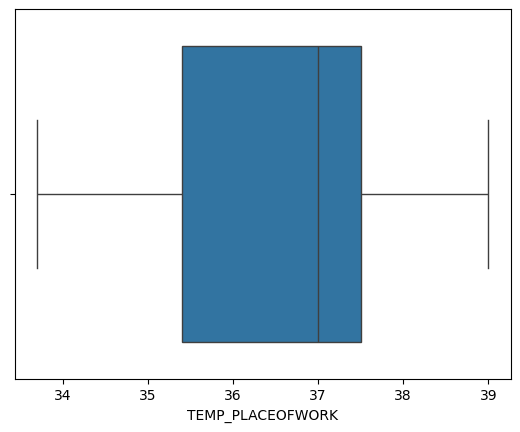

In [ ]:
# Checking for outliers using boxplots
numerical_vars = ['AGE_OPERATOR', 'YEARS_EXP', 'HOURS_OFTRAINING_SECURITY', 'NOISE_ATPLACE', 'SCORE_ILLUM', 'TEMP_PLACEOFWORK']
for var in numerical_vars:
    sns.boxplot(x=dp[var])
    plt.show()

**Q3)A)** We can see that there are no significant outliers or any null values in any of the variables considered. We can see that all the workers have gone through 14.5 hours of mandatory safety trainings. The only outliers are found in the Noise at place variable, which we can interview on a case by case basis.


**Q3)B)**
**Excluded Variables:** ID_LINE has been excluded as it serves as an identifier rather than a feature that influences outcomes.

**Predictor Variables:** AGE_OPERATOR, YEARS_EXP, and HOURS_OFTRAINING_SECURITY are typical predictors as they describe the operator’s background and experience, which influences performance and safety.

**Outcome Variables:** SCORE_RISKOFMACH and ACA are outcomes because they are direct measures of safety.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [6]:
# Load the dataset
df = pd.read_excel('/content/PLANT_SECURITY_SV (2).xlsx', sheet_name='DB')

# Check for any missing values and handle them (e.g., with imputation or removal)
df.isnull().sum()  # Uncomment to check for missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Example of imputation with mean values

# Convert categorical variables to numeric if necessary
# df = pd.get_dummies(df, columns=['EMPLOYEE_CAT'], drop_first=True)  # Example for categorical conversion


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = df[['AGE_OPERATOR', 'EMPLOYEE_CAT', 'YEARS_EXP', 'USE_PPE', 'AVAILABLE_SPACE']]
y = df['ACA'] > 0  # Assuming ACA > 0 indicates unsafe acts, making it a binary outcome

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with LASSO penalty
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg_lasso.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred = log_reg_lasso.predict(X_test_scaled)
print("Classification Report for Logistic Regression with LASSO:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report for Logistic Regression with LASSO:
               precision    recall  f1-score   support

       False       0.80      0.99      0.88       135
        True       0.67      0.11      0.18        38

    accuracy                           0.79       173
   macro avg       0.73      0.55      0.53       173
weighted avg       0.77      0.79      0.73       173

Confusion Matrix:
 [[133   2]
 [ 34   4]]


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_rf = random_forest.predict(X_test_scaled)
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.80      0.85      0.83       135
        True       0.33      0.26      0.29        38

    accuracy                           0.72       173
   macro avg       0.57      0.56      0.56       173
weighted avg       0.70      0.72      0.71       173

Confusion Matrix:
 [[115  20]
 [ 28  10]]


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Predictions and Evaluation
y_pred_gb = gradient_boosting.predict(X_test_scaled)
print("Classification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

       False       0.81      0.96      0.87       135
        True       0.54      0.18      0.27        38

    accuracy                           0.79       173
   macro avg       0.67      0.57      0.57       173
weighted avg       0.75      0.79      0.74       173

Confusion Matrix:
 [[129   6]
 [ 31   7]]


In [12]:
# Define parameter grid for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize the model
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Setup GridSearchCV
grid_search_lr = GridSearchCV(log_reg_lasso, param_grid_lr, cv=5, scoring='accuracy', return_train_score=True)

# Fit the model
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters and scores
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation score (Accuracy):", grid_search_lr.best_score_)


Best parameters for Logistic Regression: {'C': 1}
Best cross-validation score (Accuracy): 0.7486184965071422


In [13]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30]
}

# Initialize the model
random_forest = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy', return_train_score=True)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and scores
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score (Accuracy):", grid_search_rf.best_score_)


Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score (Accuracy): 0.712501303305182


In [14]:
# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Initialize the model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Setup GridSearchCV
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring='accuracy', return_train_score=True)

# Fit the model
grid_search_gb.fit(X_train_scaled, y_train)

# Best parameters and scores
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best cross-validation score (Accuracy):", grid_search_gb.best_score_)


Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score (Accuracy): 0.744239391095819


In [20]:
# evaluation for Logistic Regression with the best parameters
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test_scaled)
print("Test set accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))

# Using the best estimator from GridSearchCV for Random Forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)

# Calculate the accuracy score for Random Forest on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the test set accuracy for Random Forest
print("Test set accuracy for Random Forest:", accuracy_rf)

# Using the best estimator from GridSearchCV for Gradient Boosting
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test_scaled)

# Calculate the accuracy score for Gradient Boosting on the test set
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Print the test set accuracy for Gradient Boosting
print("Test set accuracy for Gradient Boosting:", accuracy_gb)


Test set accuracy for Logistic Regression: 0.791907514450867
Test set accuracy for Random Forest: 0.7283236994219653
Test set accuracy for Gradient Boosting: 0.7803468208092486


In [16]:
from sklearn.metrics import confusion_matrix

def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    return cm


In [17]:
# Optimal hyperparameters
print("Optimal hyperparameters for Logistic Regression:", grid_search_lr.best_params_)

# Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy for Logistic Regression:", accuracy_lr)

# Confusion Matrix
cm_lr = display_confusion_matrix(y_test, y_pred_lr)

# Variable Importance (Coefficient magnitude)
coefficients = grid_search_lr.best_estimator_.coef_.flatten()
features = X.columns
feature_importance_lr = pd.Series(coefficients, index=features).sort_values(key=abs, ascending=False)
print("Feature importance for Logistic Regression:\n", feature_importance_lr)


Optimal hyperparameters for Logistic Regression: {'C': 1}
Accuracy for Logistic Regression: 0.791907514450867
True Negatives: 133
False Positives: 2
False Negatives: 34
True Positives: 4
Feature importance for Logistic Regression:
 USE_PPE           -0.325905
AGE_OPERATOR      -0.283476
AVAILABLE_SPACE   -0.234148
EMPLOYEE_CAT      -0.147085
YEARS_EXP          0.141227
dtype: float64


In [18]:
# Optimal hyperparameters
print("Optimal hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Predictions using the best estimator
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest:", accuracy_rf)

# Confusion Matrix
cm_rf = display_confusion_matrix(y_test, y_pred_rf)

# Variable Importance
importances_rf = grid_search_rf.best_estimator_.feature_importances_
feature_importance_rf = pd.Series(importances_rf, index=features).sort_values(ascending=False)
print("Feature importance for Random Forest:\n", feature_importance_rf)


Optimal hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Accuracy for Random Forest: 0.7283236994219653
True Negatives: 118
False Positives: 17
False Negatives: 30
True Positives: 8
Feature importance for Random Forest:
 AGE_OPERATOR       0.356825
AVAILABLE_SPACE    0.190483
EMPLOYEE_CAT       0.188259
YEARS_EXP          0.163764
USE_PPE            0.100668
dtype: float64


In [19]:
# Optimal hyperparameters
print("Optimal hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)

# Predictions using the best estimator
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test_scaled)

# Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy for Gradient Boosting:", accuracy_gb)

# Confusion Matrix
cm_gb = display_confusion_matrix(y_test, y_pred_gb)

# Variable Importance
importances_gb = grid_search_gb.best_estimator_.feature_importances_
feature_importance_gb = pd.Series(importances_gb, index=features).sort_values(ascending=False)
print("Feature importance for Gradient Boosting:\n", feature_importance_gb)


Optimal hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 200}
Accuracy for Gradient Boosting: 0.7803468208092486
True Negatives: 130
False Positives: 5
False Negatives: 33
True Positives: 5
Feature importance for Gradient Boosting:
 AGE_OPERATOR       0.413651
USE_PPE            0.258957
EMPLOYEE_CAT       0.182732
AVAILABLE_SPACE    0.092681
YEARS_EXP          0.051979
dtype: float64
